In [1]:
import numpy as np
from qiskit import *
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city


In [2]:
s = 101011

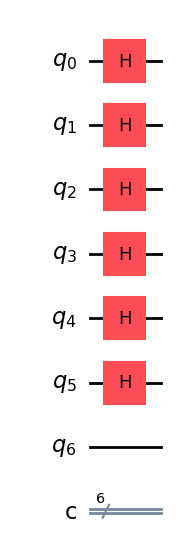

In [ ]:
qc = QuantumCircuit(6+1,6)
#apply the Hadamard gate to the first 6 qubits
qc.h([0,1,2,3,4,5])
qc.draw('mpl')

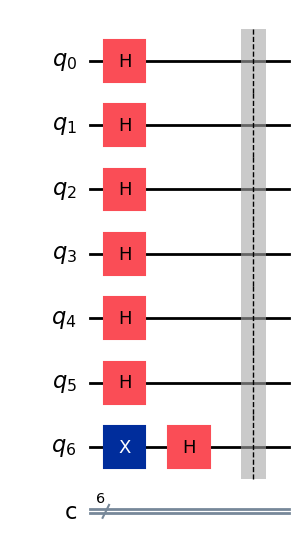

In [ ]:
#prepare the ancilla qubit
qc.x(6)
qc.h(6) #flip with Hadamard to |->
qc.barrier()
qc.draw('mpl')

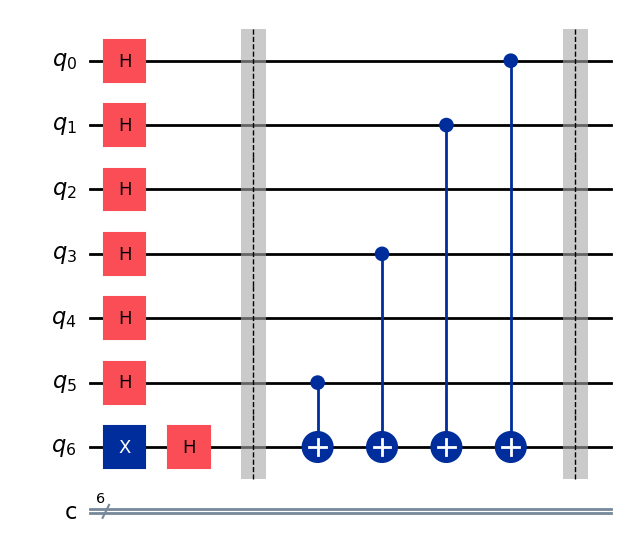

In [ ]:
#encode the number s
qc.cx(5, 6)
qc.cx(3, 6)
qc.cx(1, 6)
qc.cx(0, 6)
qc.barrier()
qc.draw('mpl')

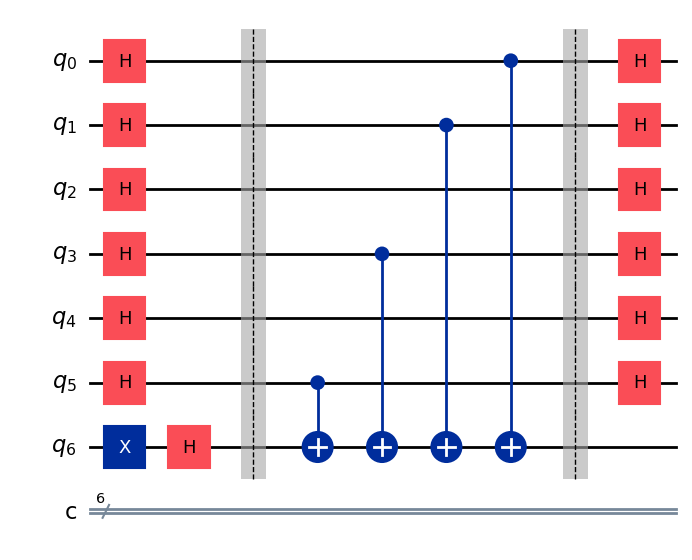

In [ ]:
#redo the Hadamard gates so that they are out of superposition
qc.h([0,1,2,3,4,5])
qc.draw('mpl')

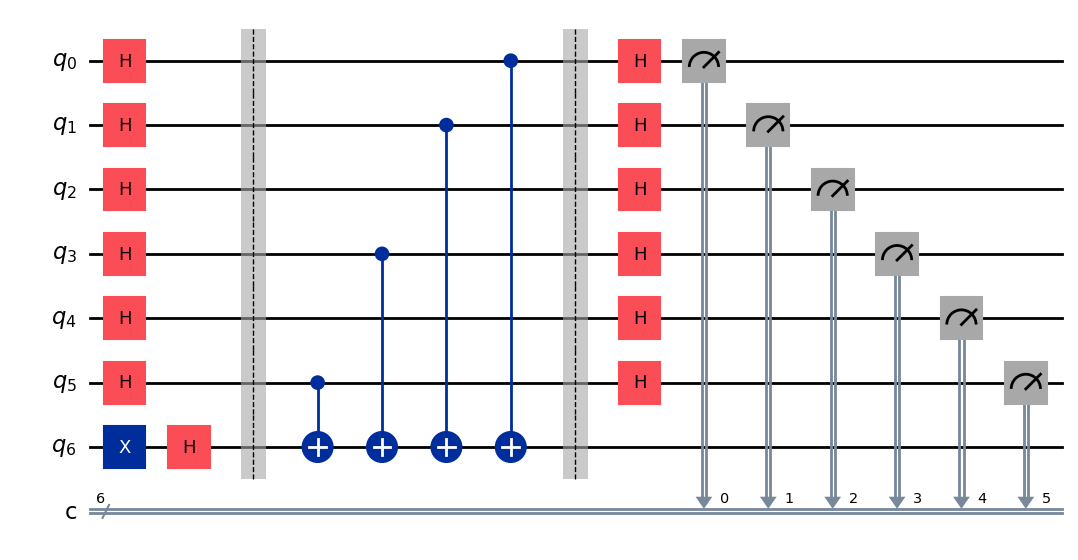

In [ ]:
#collapse the qubits and store in classical bits
qc.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
qc.draw('mpl')

In [8]:
simulator = AerSimulator()
qc = transpile(qc, simulator)
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)

{'101011': 1024}
